In [2]:
import tensorflow as tf
from matplotlib import pyplot as plt
import cv2
import os
import numpy as np

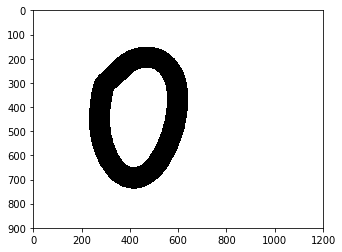

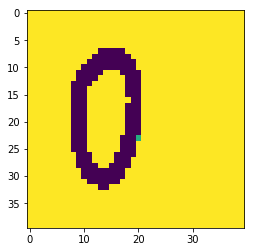

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[  0   0   0   0   0   0   0   0 255 255 255   0   0   0   0   0   0   0
 255 255 255   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0]


In [22]:
impath = ['datasets/English/Img/Sample%03d' % (x+1) for x in range(10)]
first_img = cv2.imread('datasets/English/Img/Sample001/img001-001.png',cv2.IMREAD_GRAYSCALE)
first = cv2.resize(first_img,(40,40))
plt.imshow(first_img,cmap='gray')
plt.show()
plt.figure()
plt.imshow(first)
plt.show()
print(255-first)
a = 255-first
print(a[20])

In [23]:
IMG_SIZE = 40
data_set = []
Y_train = [str(i) for i in range(10)]
def load_data():
    for p in impath:
        label = impath.index(p)
        for pp in os.listdir(p):
            try:
                im = cv2.imread(os.path.join(p,pp),cv2.IMREAD_GRAYSCALE)
                new_im = cv2.resize(im,(IMG_SIZE,IMG_SIZE))
                data_set.append([new_im,label])
            except Exception as e:
                pass
            
load_data()

In [25]:
import random
import pickle
random.shuffle(data_set)
with open('data_set.pickle','wb') as f:
    pickle.dump(data_set,f)

In [26]:
def load_train_data():
    X_train = []
    Y_train = []
    with open('data_set.pickle','rb') as f:
        pickle_data = pickle.load(f)
    for x in pickle_data:
        X_train.append(x[0])
        Y_train.append(x[1])
    return X_train,Y_train

2
3
0
8
4
0
2
8
1
3


In [28]:
def load_train_data():
    X_train = []
    Y_train = []
    with open('data_set.pickle','rb') as f:
        pickle_data = pickle.load(f)
    for x in pickle_data:
        X_train.append(x[0])
        Y_train.append(x[1])
    return X_train,Y_train
X_train,Y_train = load_train_data()
print(Y_train[:10])

[2, 3, 0, 8, 4, 0, 2, 8, 1, 3]


In [60]:
print(Y_train[:20])
#[2 7 0 8 4 0 2 8 1 3 8 7 8 4 4 5 9 8 2 7]

[2 3 0 8 4 0 2 8 1 3 8 7 8 4 9 5 9 8 2 7]


In [30]:
X_train = np.reshape(X_train,(-1,IMG_SIZE,IMG_SIZE,1))
Y_train = np.reshape(Y_train,(-1,))

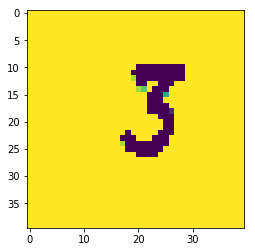

In [59]:
X_train.shape
X_train[1:].shape
tx = np.reshape(X_train,(-1,IMG_SIZE,IMG_SIZE))
plt.imshow(tx[1])

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten,Conv2D,MaxPooling2D

In [46]:
ty[0]

2

In [53]:
X = X_train / 255.0
model = Sequential()
model.add(Conv2D(64,(3,3),input_shape=(IMG_SIZE,IMG_SIZE,1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))

#model.add(Dropout(0.2))

model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X,Y_train,batch_size=50,validation_split=0.2,epochs=10)

Train on 440 samples, validate on 110 samples
Epoch 1/10
440/440 [==============================] - 4s 9ms/step - loss: 2.3519 - acc: 0.1045 - val_loss: 2.2807 - val_acc: 0.1182
Epoch 2/10
440/440 [==============================] - 3s 6ms/step - loss: 2.2106 - acc: 0.1682 - val_loss: 2.1858 - val_acc: 0.2091
Epoch 3/10
440/440 [==============================] - 3s 8ms/step - loss: 1.9922 - acc: 0.3614 - val_loss: 1.9501 - val_acc: 0.3545
Epoch 4/10
440/440 [==============================] - 3s 6ms/step - loss: 1.6461 - acc: 0.5182 - val_loss: 1.6491 - val_acc: 0.5273
Epoch 5/10
440/440 [==============================] - 3s 6ms/step - loss: 1.3260 - acc: 0.6023 - val_loss: 1.5715 - val_acc: 0.5273
Epoch 6/10
440/440 [==============================] - 3s 6ms/step - loss: 1.1041 - acc: 0.6477 - val_loss: 1.3541 - val_acc: 0.6273
Epoch 7/10
440/440 [==============================] - 3s 6ms/step - loss: 0.9009 - acc: 0.7205 - val_loss: 1.3271 - val_acc: 0.6364
Epoch 8/10
440/440 [==========

In [61]:
pred = model.predict(X_train[:20])
print(np.argmax(pred,1))

[2 7 0 8 4 0 2 8 1 3 8 7 8 4 4 5 9 8 2 7]


In [62]:
from tensorflow.keras.callbacks import TensorBoard
import time


In [ ]:
filename = 'mymodel-{}.ckpt'.format(int(time.time()))
tensorboard = TensorBoard(log_dir='logs/{}'.format(filename))
X = X_train / 255.0
model = Sequential()
model.add(Conv2D(64,(3,3),input_shape=(IMG_SIZE,IMG_SIZE,1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))

#model.add(Dropout(0.2))

model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X,Y_train,batch_size=50,validation_split=0.2,epochs=10,callbacks=[tensorboard])